# Binary trees

This file demonstrates data on the performance of various binary search trees.
The following data structures were implemented:

- Naive binary search tree
- AVL-Tree
- Treap
- Splay Tree
- Skip List

## Testing methods

- Each algorithm was tested on random data or sorted data, with sample sizes
    ranging from $10^6$ to $10^7$ for random data and from $10^5$ to $10^6$ for
    sorted data.
- Each sample size range was divided into 100 evenly spaced test cases
- Each test case was repeated 5 times and the average of 5 tests were taken as
    a result
- Each case with sample size of $n$ consisted of $n$ sequential inserts, followed
    by $\frac{n}{2}$ sequential erases of every other element in input data
- Random seed was set to the same value before testing begun for each of data
    structures, to ensure fair test cases
- Random-based data structures (SkipList, Treap) did not utilize C `rand()`
    function to not interfere with random test generation. Classes of module
    `<random>` were used instead
- Long tests (>1 minute) were not repeated and the testing was not continued

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random_insert = pd.read_csv("results/test_random_insert.csv")\
                    .pivot(index="Sample Size", columns="Tree", values="Elapsed Time (ms)")
random_erase = pd.read_csv("results/test_random_erase.csv")\
                    .pivot(index="Sample Size", columns="Tree", values="Elapsed Time (ms)")
sorted_insert = pd.read_csv("results/test_sorted_insert.csv")\
                    .pivot(index="Sample Size", columns="Tree", values="Elapsed Time (ms)")
sorted_erase = pd.read_csv("results/test_sorted_erase.csv")\
                    .pivot(index="Sample Size", columns="Tree", values="Elapsed Time (ms)")


## Random data

Here are the results of tests on random input data:

<Axes: title={'center': 'Random erase performance (log scale)'}, xlabel='Sample Size', ylabel='Elapsed Time (ms)'>

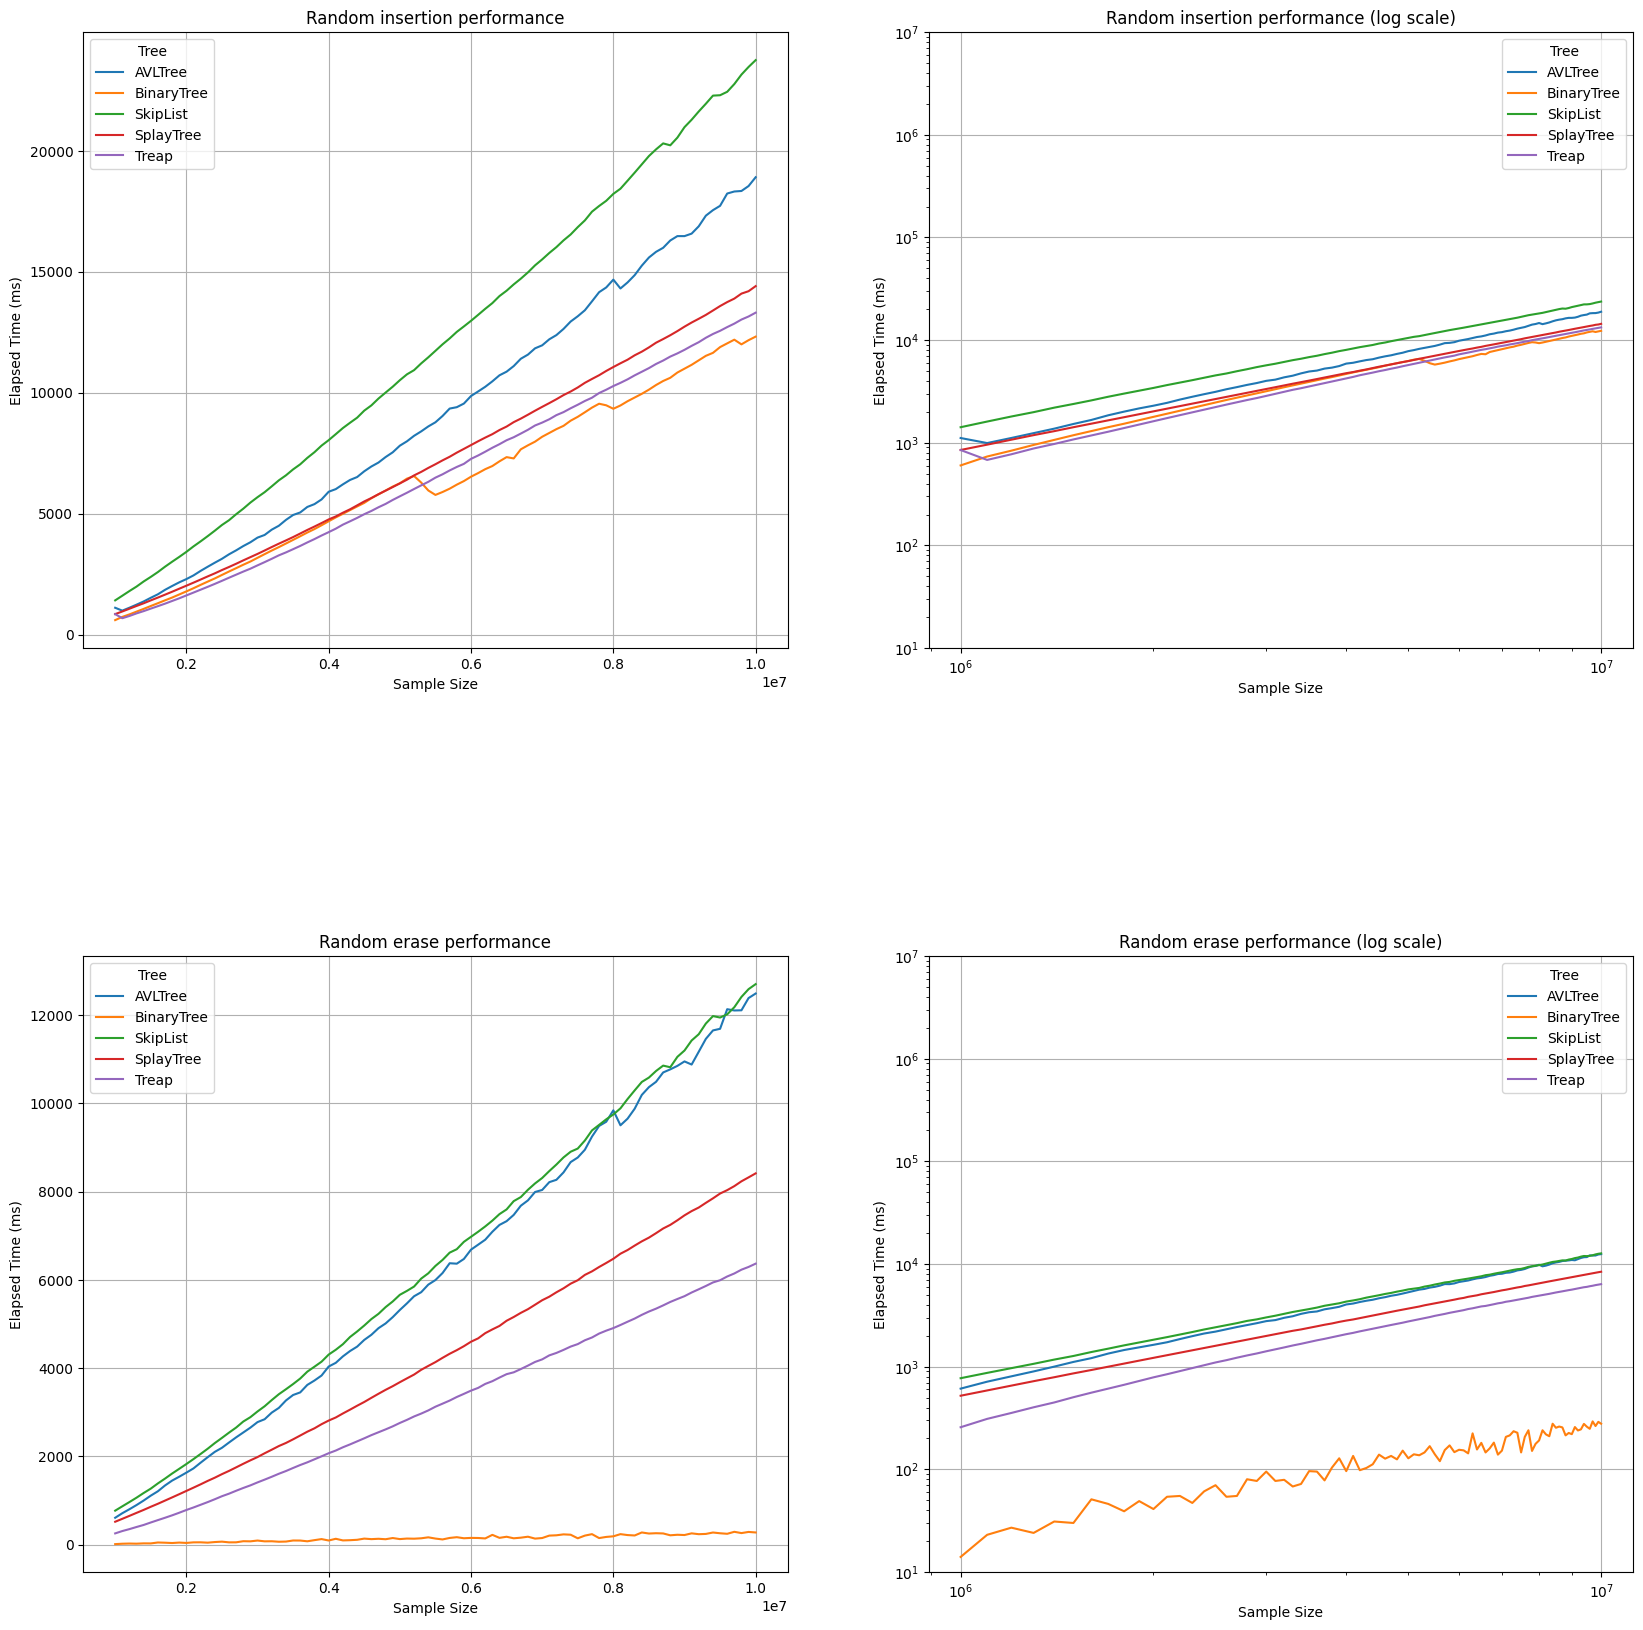

In [3]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
insert, erase = axes
figure.subplots_adjust(hspace=0.5)
random_insert.plot(
        ax=insert[0],
        ylabel="Elapsed Time (ms)",
        title="Random insertion performance",
        grid=True)
random_insert[random_insert.values > 0].plot(
        ax=insert[1],
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Random insertion performance (log scale)",
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)
random_erase.plot(
        ax=erase[0],
        ylabel="Elapsed Time (ms)",
        title="Random erase performance",
        grid=True)
random_erase[random_erase.values > 0].plot(
        ax=erase[1],
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Random erase performance (log scale)",
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)

As we can see, binary tree clearly outperforms other data structures, due to its
simple implementation and lack of any time-consuming self-balancing
operations. This is particularly noticeable while performing `erase` operation,
where naive implementation outperforms self-balancing ones by a factor of around 10.

As we'll see next, the performance of binary tree can degrade significantly in
some cases, so for now we will notice, that the closest competitor of naive binary
tree in this scenario is Treap.

## Sorted data results

Here are the results of tests on sorted data:

<Axes: title={'center': 'Sorted erase performance (log scale)'}, xlabel='Sample Size', ylabel='Elapsed Time (ms)'>

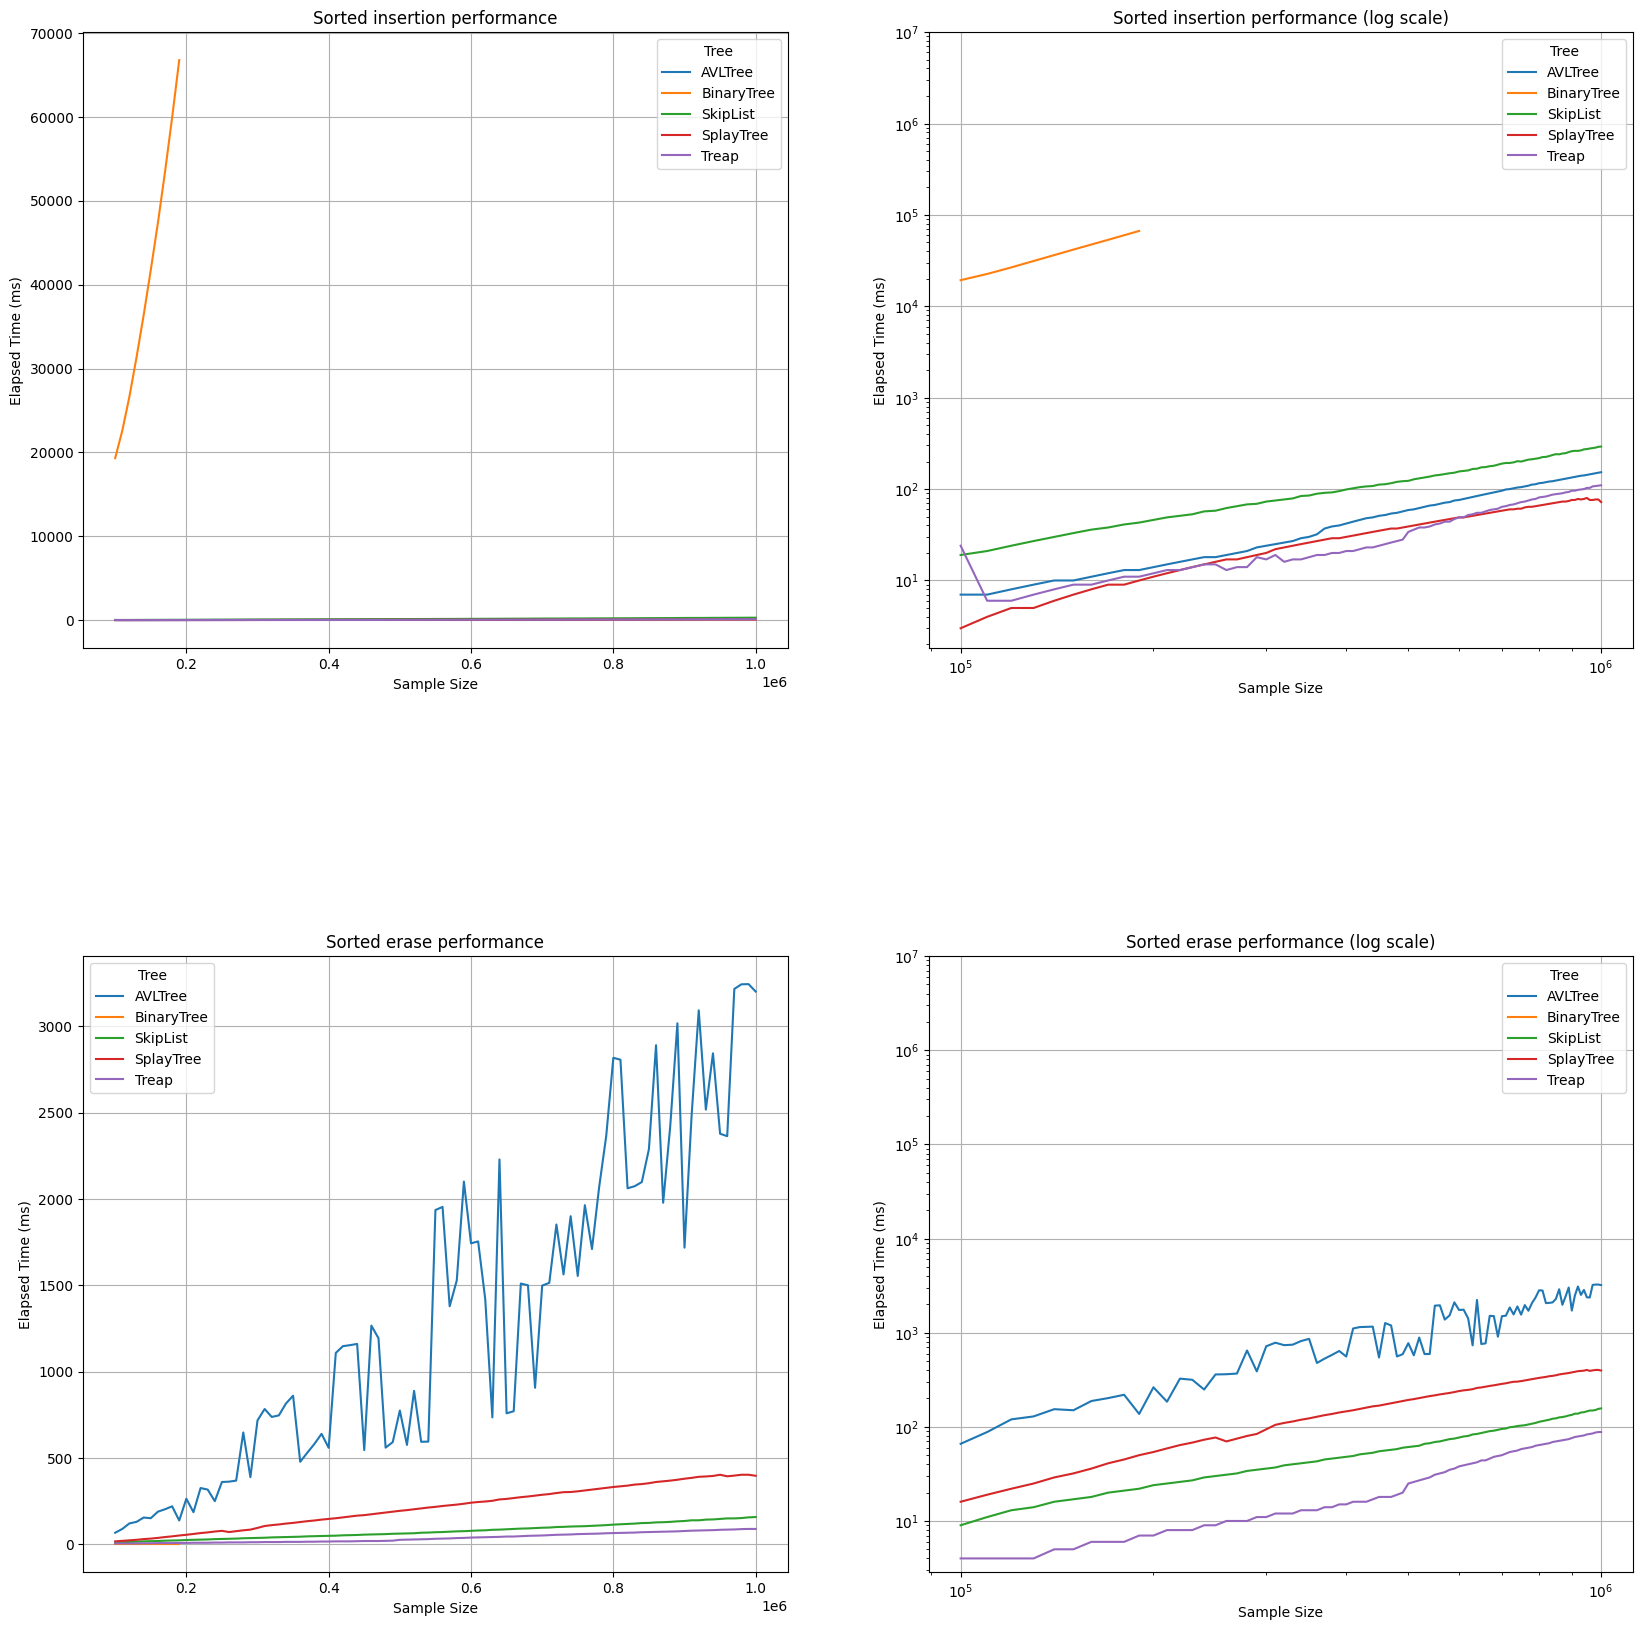

In [4]:

figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
insert, erase = axes
figure.subplots_adjust(hspace=0.5)
sorted_insert.plot(
        ax=insert[0],
        ylabel="Elapsed Time (ms)",
        title="Sorted insertion performance",
        grid=True)
sorted_insert[sorted_insert.values > 0].plot(
        ax=insert[1],
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Sorted insertion performance (log scale)",
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)
sorted_erase.plot(
        ax=erase[0],
        ylabel="Elapsed Time (ms)",
        title="Sorted erase performance",
        grid=True)
sorted_erase[sorted_erase.values > 0].plot(
        ax=erase[1],
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Sorted erase performance (log scale)",
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)

Naive implementation of binary search tree performs very slowly and doesn't
let us see the difference in performance of other data structures. We will
consider them separately:

<Axes: title={'center': 'Sorted erase performance (log scale)'}, xlabel='Sample Size', ylabel='Elapsed Time (ms)'>

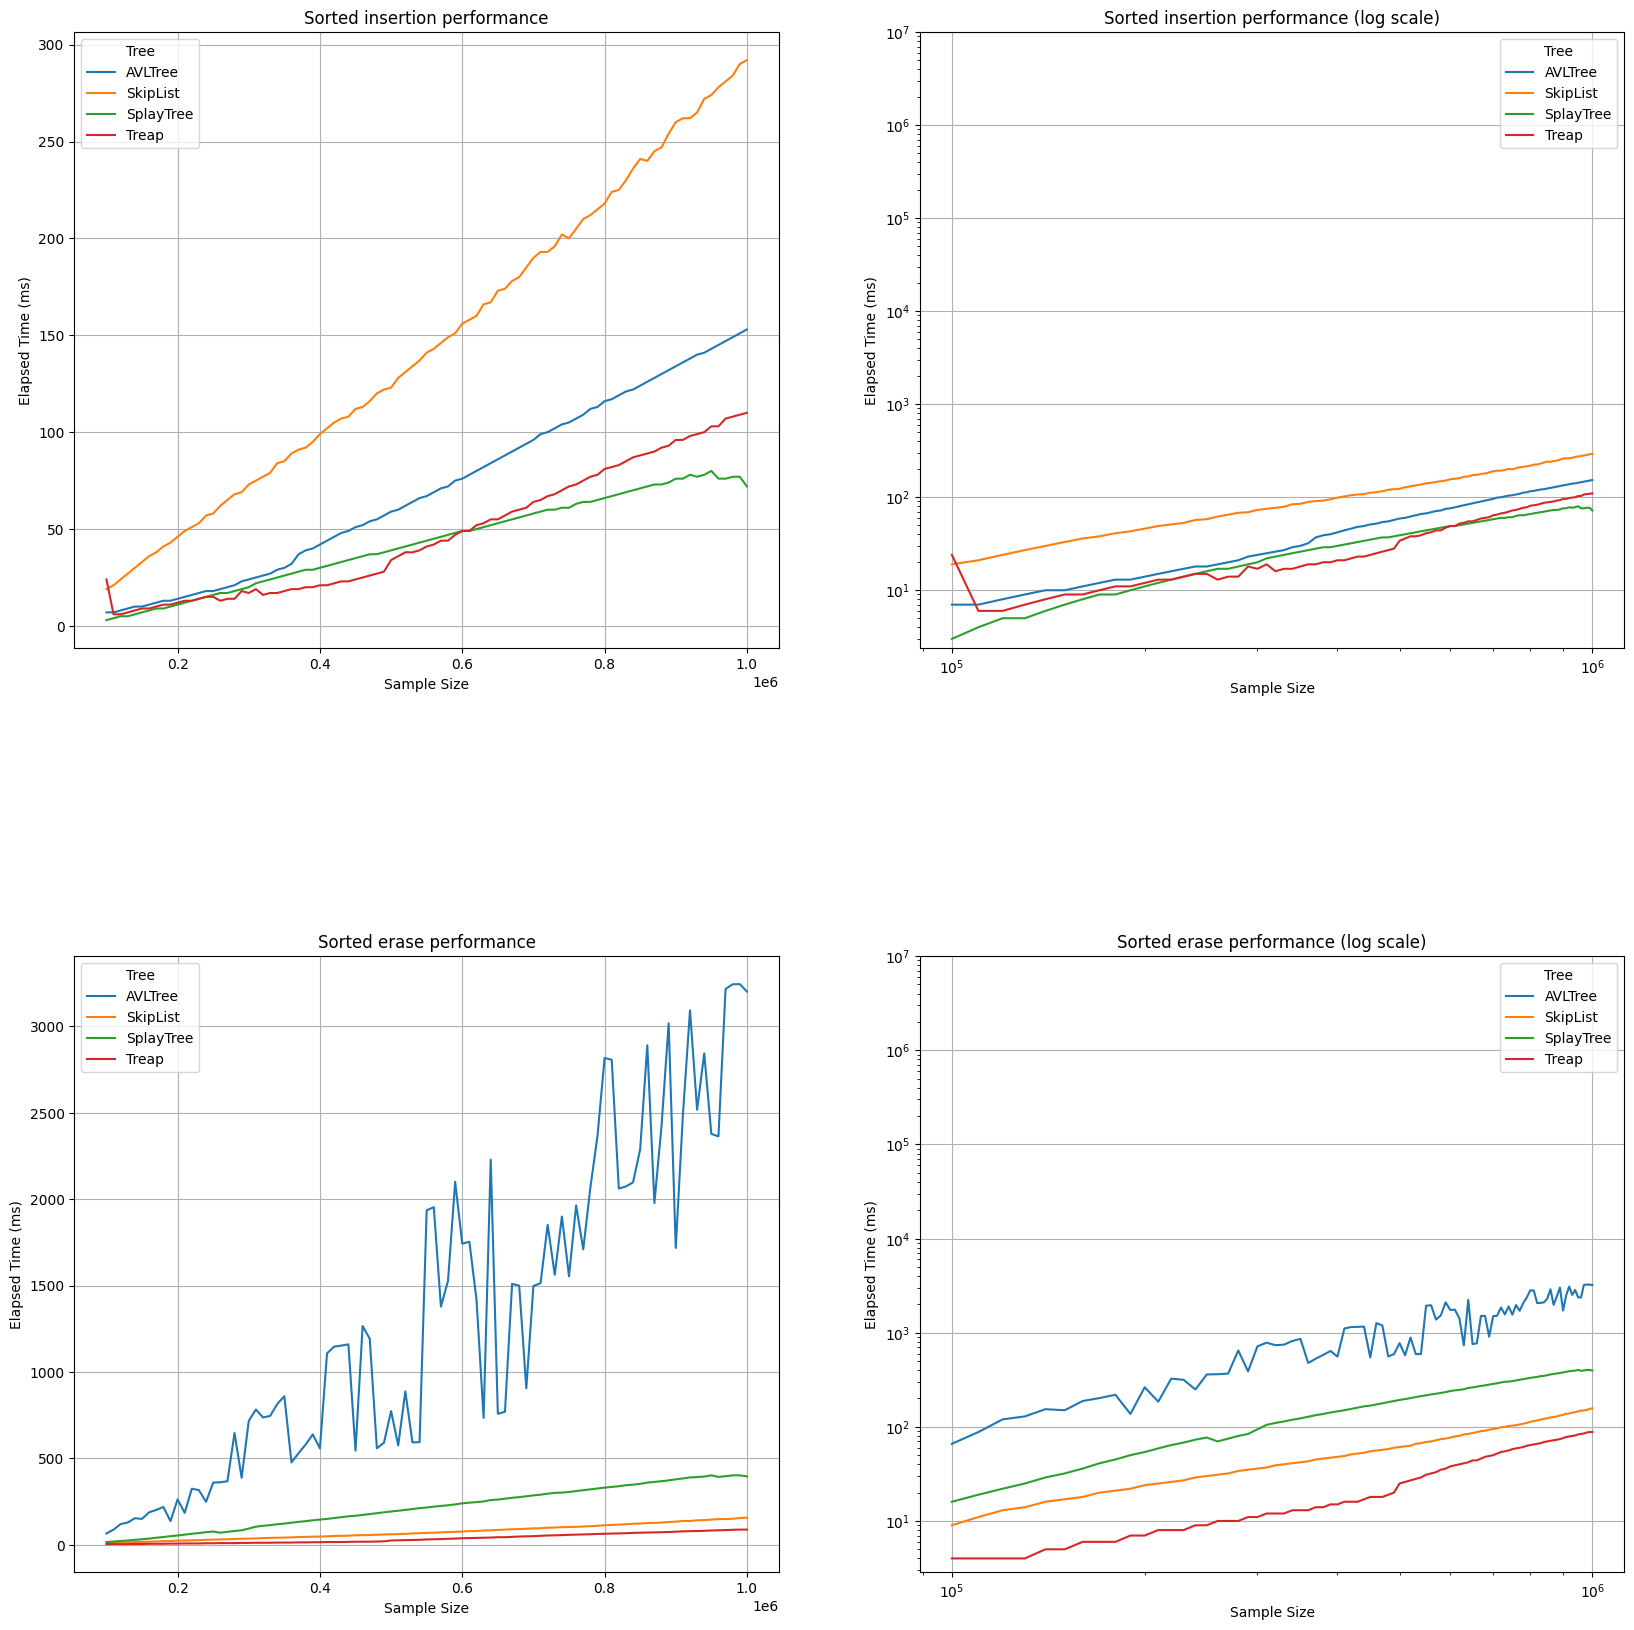

In [5]:
sorted_insert = sorted_insert[[col for col in sorted_insert.columns if col != "BinaryTree"]]
sorted_erase = sorted_erase[[col for col in sorted_erase.columns if col != "BinaryTree"]]
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
insert, erase = axes
figure.subplots_adjust(hspace=0.5)
sorted_insert.plot(
        ax=insert[0],
        ylabel="Elapsed Time (ms)",
        title="Sorted insertion performance",
        grid=True)
sorted_insert[sorted_insert.values > 0].plot(
        ax=insert[1],
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Sorted insertion performance (log scale)",
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)
sorted_erase.plot(
        ax=erase[0],
        ylabel="Elapsed Time (ms)",
        title="Sorted erase performance",
        grid=True)
sorted_erase[sorted_erase.values > 0].plot(
        ax=erase[1],
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Sorted erase performance (log scale)",
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)

Without naive binary search tree getting in the way we can see, that Splay Tree is performing the best on `insert` operation. However it is noticeably outperformed by Treap on `erase` operation.

The performance graph of AVL tree is jagged due to great variance in its performance. This behavior is reproducible, the repeated tests with the same seed showed spikes on exactly the same values. The `erase` operation on AVL tree seems to be inconsistent in its performance, time of execution of nearby tests differs
by around a factor of 2 to 3. The research sadly failed to find the exact reason for this.

# Conclusions

Among all the implementations included in the research, Treap behaved consistently
better than most others. It was surpassed only by naive binary tree on random data
and by Splay Tree on sorted `erase` operations. However, the performance of
naive binary tree implementation degraded drastically on sorted data, while the
difference between the performance of Splay Tree and Treap was close to negligible.

It seems, that among all the implementations in the research, the Treap performs
better. However, we should note that the research did not include some of the
advanced tree-like data structures (namely Red-Black Tree and B-tree). Another
important fact is that the Treap data structures is based on random distribution
of node priorities and cannot be therefore used in cases, where strictly proven
non-probabilistic time complexity is required. Among the researched implementations
only AVL Tree satisfies this property, but this implementation appears to perform
slightly inconsistent on some data.